<a href="https://colab.research.google.com/github/tasmita0131/Tasmita-Tanjim/blob/main/Math208_HW02_Week07_19723_Tasmita_Tanjim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Current time: 2023-10-20 07:27:41.930482
------ Statistics for Glucose ------
Glucose:
Mean: 130.06666666666666, 
Variance: 1039.1955555555553, 
Std Dev: 32.23655619875602
Q1: 105.0, 
Median: 122.0,
Q3: 144.0
Z-scores: [0.5563042535550174, -1.397998793320415, 1.6420281684858133, -1.273916060185467, 0.21507673743391015, -0.43635761152456737, -1.6151435763065742, -0.4673782948083044, 2.0763177344581316, -0.15717146197093412, -0.6224817112269895, 1.1767179192297579, 0.2771181040013842, 1.8281522681882354, 1.114676552662284, -0.9326885440643597, -0.3743162449570933, -0.7155437610782006, -0.8396264942131486, -0.4673782948083044, -0.12615077868719712, -0.9637092273480967, 2.0452970511743946, -0.3432955616733563, 0.4012008371363323, -0.15717146197093412, 0.5252835702712804, -1.0257505939155709, 0.46324220370380637, -0.40533692824083034]

------ Statistics for BloodPressure ------

BloodPressure:
Mean: 68.53333333333333, 
Variance: 553.0488888888889, 
Std Dev: 23.516991493149987
Q1: 65.0, 
Med

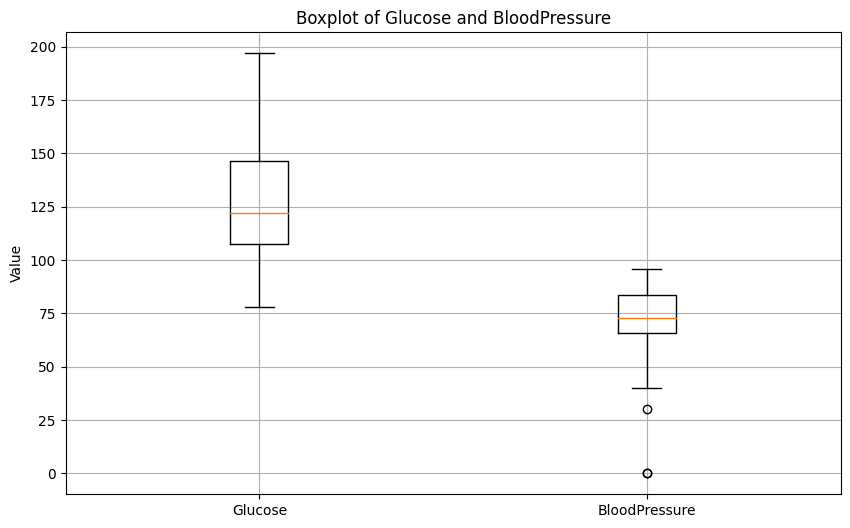

In [4]:
#Question no 1
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from datetime import datetime

# Function to calculate the mean
def mean(data):
    total_sum = 0
    n = 0
    for x in data:
        total_sum += x
        n += 1
    return total_sum / n

# Function to calculate the variance using a while loop
def variance(data, mean):
    total_sum = 0
    n = 0
    i = 0
    while i < len(data):
        total_sum += (data[i] - mean) ** 2
        n += 1
        i += 1
    return total_sum / n


# Function to calculate standard deviation
def std_dev(variance):
    var = variance ** 0.5
    return var

# Function to calculate Z-scores
def z_scores(data, mean, std_dev):
    z_scores = []
    for x in data:
        z = (x - mean) / std_dev
        z_scores.append(z)
    return z_scores

# Function to calculate median

def median(data):
  sorted_num = sorted(data)    #using sort function to get the numbers in increasing pattern
  length = len(data)       #calculating the length of the sorted_num

  if length % 2 == 0:                     #if the position is even
    med_1 = sorted_num[length // 2 - 1]   #calculating the position before the middle position
    med_2 = sorted_num[length // 2]
    med = (med_1 + med_2) / 2

  else:
     med =  sorted_num[length // 2]

  return med


# Function to calculate quartiles Q1, Q2 (median), and Q3
def calc_quartiles(data):
    data.sort()
    n = len(data)

    # Calculate Q1
    m = n // 4
    q1 = (data[m - 1] + data[m]) / 2

    # Calculate Median (Q2)
    m = n // 2
    median = (data[m - 1] + data[m]) / 2 if n % 2 == 0 else data[m]

    # Calculate Q3
    m = 3 * (n // 4)
    q3 = (data[m - 1] + data[m]) / 2

    return q1, median, q3



# Read the Excel file
df = pd.read_excel("original_diabetes.xlsx")

df.dropna(subset=['Glucose', 'BloodPressure'], inplace = True)


# Extract Glucose and BloodPressure data
glucose_data = df['Glucose'].tolist()
bp_data = df['BloodPressure'].tolist()

current_time = datetime.now()
print(f"Current time: {current_time}")

# Statistics for Glucose

mean_glucose = mean(glucose_data)
variance_glucose = variance(glucose_data, mean_glucose)
std_dev_glucose = std_dev(variance_glucose)
z_scores_glucose = z_scores(glucose_data, mean_glucose, std_dev_glucose)
q1_glucose, median_glucose, q3_glucose = calc_quartiles(glucose_data)

print("------ Statistics for Glucose ------")
print(f"Glucose:\nMean: {mean_glucose}, \nVariance: {variance_glucose}, \nStd Dev: {std_dev_glucose}")
print(f"Q1: {q1_glucose}, \nMedian: {median_glucose},\nQ3: {q3_glucose}")
print(f"Z-scores: {z_scores_glucose}\n")


# Statistics for BloodPressure
mean_bp = mean(bp_data)
variance_bp = variance(bp_data, mean_bp)
std_dev_bp = std_dev(variance_bp)
z_scores_bp = z_scores(bp_data, mean_bp, std_dev_bp)
q1_bp, median_bp, q3_bp = calc_quartiles(bp_data)

print("------ Statistics for BloodPressure ------\n")
print(f"BloodPressure:\nMean: {mean_bp}, \nVariance: {variance_bp}, \nStd Dev: {std_dev_bp}")
print(f"Q1: {q1_bp}, \nMedian: {median_bp}, \nQ3: {q3_bp}")
print(f"Z-scores: {z_scores_bp}\n")


# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([glucose_data, bp_data], labels=['Glucose', 'BloodPressure'])
plt.title('Boxplot of Glucose and BloodPressure')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [6]:
#Number 2 Chebyshev's inequality.
import numpy as np
from datetime import datetime


current_time = datetime.now()
print(f"Current time: {current_time}")


# Generate an array of 50 random numbers uniformly distributed between -20 and 20
uniform_nums = np.random.uniform(-20, 20, 50)
uniform_nums = np.array(uniform_nums)  # Ensure it is a NumPy array

# Function to test Chebyshev's inequality
def check_chebyshev(arr, factor):
    # Calculate the mean and standard deviation of the array
    avg = np.mean(arr)
    std_deviation = np.std(arr)


    # Count the number of elements that fall within 'factor' standard deviations from the mean
    count_within_range = np.sum((arr >= (avg - factor * std_deviation)) & (arr <= (avg + factor * std_deviation)))


    # Calculate the probability of elements falling within that range
    prob_within_range = count_within_range / len(arr)

    # Calculate the theoretical lower bound of probability using Chebyshev's inequality
    min_prob_bound = 1 - 1 / (factor ** 2)

    return prob_within_range, min_prob_bound                      # Return both calculated and theoretical probabilities

# Loop through different k values to verify Chebyshev's inequality
for k_value in range(1, 6):
    # Get the calculated and theoretical probabilities
    calculated_prob, min_theoretical_prob = check_chebyshev(uniform_nums, k_value)

    # Check if the calculated probability satisfies Chebyshev's inequality
    is_satisfied = calculated_prob >= min_theoretical_prob

    # Print the results
    print(f"For k_value = {k_value}:")
    print(f"Calculated probability within {k_value} standard deviations: {calculated_prob:.2f}")
    print(f"Minimum Theoretical Probability: {min_theoretical_prob:.2f}")
    print(f"Does it satisfy the inequality: {'Yes' if is_satisfied else 'No'}\n")


Current time: 2023-10-20 07:41:42.903474
For k_value = 1:
Calculated probability within 1 standard deviations: 0.56
Minimum Theoretical Probability: 0.00
Does it satisfy the inequality: Yes

For k_value = 2:
Calculated probability within 2 standard deviations: 1.00
Minimum Theoretical Probability: 0.75
Does it satisfy the inequality: Yes

For k_value = 3:
Calculated probability within 3 standard deviations: 1.00
Minimum Theoretical Probability: 0.89
Does it satisfy the inequality: Yes

For k_value = 4:
Calculated probability within 4 standard deviations: 1.00
Minimum Theoretical Probability: 0.94
Does it satisfy the inequality: Yes

For k_value = 5:
Calculated probability within 5 standard deviations: 1.00
Minimum Theoretical Probability: 0.96
Does it satisfy the inequality: Yes



Slope (m): 141.21
Intercept (c): -466.88
Correlation Coefficient: 0.94


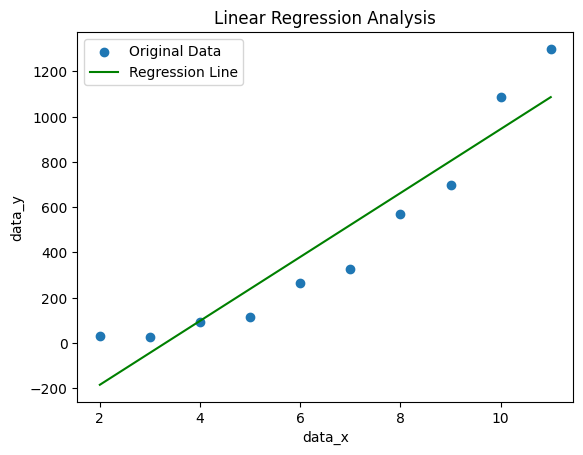

The linear model may not adequately represent this dataset.


In [5]:
#Question 3
import numpy as np
import matplotlib.pyplot as plt

# Data points for X and Y
data_x = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
data_y = np.array([30, 25, 95, 115, 265, 325, 570, 700, 1085, 1300])

# Calculate the mean values for X and Y
avg_x = np.mean(data_x)
avg_y = np.mean(data_y)

# Compute the numerator and denominator for linear regression formula
num = np.sum((data_x - avg_x) * (data_y - avg_y))
den = np.sum((data_x - avg_x) ** 2)

# Compute slope (m) and intercept (c)
m = num / den
c = avg_y - m * avg_x

# Calculate the coefficient of linear correlation (correlation_coeff)
correlation_coeff = num / np.sqrt(np.sum((data_x - avg_x) ** 2) * np.sum((data_y - avg_y) ** 2))

# Print slope, intercept and coefficient of linear correlation
print(f"Slope (m): {m:.2f}")
print(f"Intercept (c): {c:.2f}")
print(f"Correlation Coefficient: {correlation_coeff:.2f}")

# Plot the data and the linear regression line
plt.scatter(data_x, data_y, label="Original Data")
plt.plot(data_x, c + m * data_x, color='green', label="Regression Line")
plt.xlabel("data_x")
plt.ylabel("data_y")
plt.title("Linear Regression Analysis")
plt.legend()
plt.show()

# Determine the suitability of a linear model
if abs(correlation_coeff) >= 0.95:
    print("The linear model is a good fit for this dataset.")
else:
    print("The linear model may not adequately represent this dataset.")
